<a href="https://colab.research.google.com/github/Raisler/DataScience_Portfolio/blob/master/M%C3%A9trica_de_Similaridade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similaridade entre textos 

O quão semelhante é um texto? é possível utilizando uma métrica simples para comparar possíveis plágios com a obra original? procurar textos parecidos? comparar perfis em redes sociais? procurar grupos de textos que são mais parecidos, neste último talvez um "k-means" seja mais eficiente 😅.



In [1]:
!easy_install matplotlib-venn

Searching for matplotlib-venn
Best match: matplotlib-venn 0.11.5
Adding matplotlib-venn 0.11.5 to easy-install.pth file

Using /usr/local/lib/python2.7/dist-packages
Processing dependencies for matplotlib-venn
Finished processing dependencies for matplotlib-venn


In [2]:
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.feature_extraction.text import CountVectorizer

>word como analyzer é porque ele retira palavras com apenas 1 caractere e deixa tudo minúsculo

In [3]:
t1 = "Homem de Ferro é legal, Thor não"
t2 = "Thor é legal, Homem de ferro não"

vect = CountVectorizer(analyzer = 'word', ngram_range= (1, 2)) 

vocab = vect.fit([t1, t2])

In [4]:
vocab.vocabulary_

{'de': 0,
 'de ferro': 1,
 'ferro': 2,
 'ferro legal': 3,
 'ferro não': 4,
 'homem': 5,
 'homem de': 6,
 'legal': 7,
 'legal homem': 8,
 'legal thor': 9,
 'não': 10,
 'thor': 11,
 'thor legal': 12,
 'thor não': 13}

> O que criamos antes foi apenas para visualizar e aprender, agora criaremos os arrays de fato

In [5]:
test = vect.fit_transform([t1, t2])

In [6]:
test = test.toarray()

In [7]:
print(test)
vocab.vocabulary_ 


[[1 1 1 1 0 1 1 1 0 1 1 1 0 1]
 [1 1 1 0 1 1 1 1 1 0 1 1 1 0]]


{'de': 0,
 'de ferro': 1,
 'ferro': 2,
 'ferro legal': 3,
 'ferro não': 4,
 'homem': 5,
 'homem de': 6,
 'legal': 7,
 'legal homem': 8,
 'legal thor': 9,
 'não': 10,
 'thor': 11,
 'thor legal': 12,
 'thor não': 13}

In [8]:
intersection_list = np.amin(test, axis = 0) # Intersecção
intersection_list

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [9]:
sum = np.sum(intersection_list)  
sum

8

In [10]:
count = np.sum(test[0]) # Texto base para comparação
count

11

In [11]:
sum/count

0.7272727272727273

# DIAGRAMA DE VENN



In [12]:
x1 = "Homem de ferro é legal, Thor não"
x2 = "Thor é legal, Homem de ferro não"

vect1 = CountVectorizer(analyzer = 'word', ngram_range= (1, 2)) 
vect2 = CountVectorizer(analyzer = 'word', ngram_range = (1, 2))

x1 = vect1.fit([x1])
x2 = vect2.fit([x2])

In [13]:
print(x1.vocabulary_)
print('------')
print(x2.vocabulary_)

{'homem': 4, 'de': 0, 'ferro': 2, 'legal': 6, 'thor': 9, 'não': 8, 'homem de': 5, 'de ferro': 1, 'ferro legal': 3, 'legal thor': 7, 'thor não': 10}
------
{'thor': 9, 'legal': 6, 'homem': 4, 'de': 0, 'ferro': 2, 'não': 8, 'thor legal': 10, 'legal homem': 7, 'homem de': 5, 'de ferro': 1, 'ferro não': 3}


In [14]:
to_set1 = set(x1.vocabulary_)
to_set2 = set(x2.vocabulary_)

intersection = to_set1.intersection(to_set2)
intersection

{'de', 'de ferro', 'ferro', 'homem', 'homem de', 'legal', 'não', 'thor'}

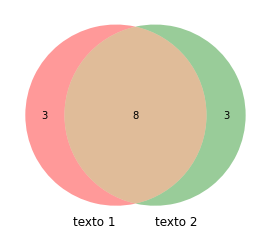

In [15]:
venn2([to_set1, to_set2], set_labels = ('texto 1', 'texto 2'))

# Função que mede a similaridade

In [57]:
def medidor_de_similaridade(text1, text2):
  to_vect = CountVectorizer(analyzer = 'word', ngram_range = (1, 2))
  result = []
  for comentario1 in text1:
    for comentario2 in text2:
      x1, x2 = to_vect.fit_transform([comentario1,comentario2])
      t1, t2 = x1.toarray(), x2.toarray()

      min = np.amin([t1, t2], axis = 0)
      sum = np.sum(min)
      count = np.sum([t1, t2][0])
      to_mean = sum/count
      result.append(to_mean)
  return result

# Caso de plágio 

LINK>  'https://noticias.uol.com.br/colunas/constanca-rezende/2020/06/27/ministro-da-educacao-copiou-ao-menos-4-trechos-de-outras-teses-em-mestrado.htm'

In [58]:
original_or_not1 = ['''
Dependendo da natureza do negócio e da teia de constituintes que o embasam, pode-se detectar 
a existência de burocratas, técnicos e outros atores engajados em projetos e ideias que, 
para eles, fazem sentido e pelos quais lutam, mesmo que ainda não os tenham materializado, 
e às vezes, somente se configurando como uma mera agenda,
 cuja conformação e evolução está sujeita a códigos de conduta, 
a fontes de poder, ao compartilhamento de uma linguagem comum, a um ambiente propício à colaboração e
 a mecanismos de difusão da inovação entre as comunidades ocupacionais com que se relacionam''']
original_or_not2 = ['''
Dependendo da natureza do negócio e da teia de constituintes que o embasam, pode-se detectar a existência de burocratas, 
técnicos e outros atores engajados em projetos e ideias que, para eles, fazem sentido e pelos quais lutam,
 mesmo que ainda não os tenham materializado,
 e às vezes, somente se configurando como uma mera agenda, cuja conformação e evolução está sujeita a códigos de conduta, 
 a fontes de poder, ao compartilhamento de uma linguagem comum,
 a um ambiente propício à colaboração e a mecanismos de difusão da inovação tecnológica

''']

medidor_de_similaridade(original_or_not1, original_or_not2)

[0.901840490797546]

# Youtube Comments

O script para a captura dos dados você pode encontrar neste repositório --> https://github.com/Raisler/Youtube_Scrapy

In [35]:
import pandas as pd

video1 = pd.read_csv('/content/video1.csv')
video2 = pd.read_csv('/content/video2.csv')
video1, video2

(      Unnamed: 0                                            comment
 0              0  Obrigado, gente! Valeu por dedicarem um pouqui...
 1              1  mauro, meu irmão… q música linda!!! q privilég...
 2              2               Dois monstros da música! Ficou lindo
 3              3  Obrigado pelo lindo presente, que nos faz cone...
 4              4  Minha esposa e eu acabamos de perder um Bebê e...
 ...          ...                                                ...
 4595        4595  Tá aí um dueto que eu sempre quis Assistir e O...
 4596        4596  Só felicidade por poder apreciar dois dos maio...
 4597        4597  Fazia um tempo q não sentia emoção em uma canç...
 4598        4598  Que bela canção!! Na voz desses dois monstros ...
 4599        4599  Pra mim os dois melhores... e, se fosse os trê...
 
 [4600 rows x 2 columns],
       Unnamed: 0                                            comment
 0              0  Música Bíblica, que aquece nosso coração para ...
 1    

In [36]:
video1.isnull().sum(), video2.isnull().sum()

(Unnamed: 0    0
 comment       0
 dtype: int64, Unnamed: 0    0
 comment       0
 dtype: int64)

In [37]:
video2.dropna(inplace = True)
video1.dropna(inplace = True)

In [38]:
video1.isnull().sum(), video2.isnull().sum()

(Unnamed: 0    0
 comment       0
 dtype: int64, Unnamed: 0    0
 comment       0
 dtype: int64)

In [39]:
video1.drop(columns = 'Unnamed: 0', inplace = True)
video2.drop(columns = 'Unnamed: 0', inplace = True)

## Limpeza dos textos

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [41]:
def clean_function(df, column_text):
  df[column_text] = df[[f'{column_text}']].replace(
      regex=r'[!/,.-]',value='').apply(lambda x: x.astype(str).str.lower()).apply(
      lambda x:x.astype(str).str.normalize('NFKD').str.encode('ascii', 
                                                        errors='ignore').str.decode('utf-8'))
  return df

In [42]:
video1 = clean_function(video1, 'comment')
video2 = clean_function(video2, 'comment')

## Juntando os textos
Para ver mais rápido, iremos juntar todos os comentários. Isso evitará muito uso compucional e demora para calcular a similaridade, já que a função 

In [50]:
comments1 = []
comments2 = []

for i in video1.comment:
  comments1.append(i + ' ')

for i in video2.comment:
  comments2.append(i + ' ')

In [51]:
a = ' '.join(comments1)
b = ' '.join(comments2)

In [52]:
# The same process
youtube_vect = CountVectorizer(analyzer = 'word', ngram_range= (1, 3)) 
fit_comments = youtube_vect.fit_transform([a, b])
array_comments_fit = fit_comments.toarray()
array_comments_fit

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 6, 6, 6]])

In [53]:
comments_intersection_list = np.amin(array_comments_fit, axis = 0) # Intersecção
comments_intersection_list

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
comments_sum = np.sum(comments_intersection_list)  
comments_sum

50189

In [55]:
comments_count = np.sum(array_comments_fit[0]) # Text base to compare
comments_count

285264

In [56]:
comments_sum/comments_count

0.17593877951651804